<a href="https://colab.research.google.com/github/red0078/food-sales-predictions/blob/main/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sale Prediction Project

By : Marde Cano

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

path = '/content/drive/MyDrive/Coding Dojo/01 Week 1: Python/sales_predictions.csv'

In [2]:
# load the dataset from Google Drive
df = pd.read_csv(path)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
# display the info of the dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# dsiplay the no. of rows/records and columns in the dataset
df.shape

(8523, 12)

## Data Cleaning

The dataset doesn't have any duplicates

In [5]:
# find duplicate rows for all columns
df.duplicated().sum()

0

Item_Weight and Outlet_Size features have missing data.

In [6]:
# get the total number of missing values for Item_Weight
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# filter the Item_weight missing data
weight_missing = df['Item_Weight'].isnull()

In [8]:
# Use pivot_table to create another dataframe to fill the missing data for Item_Weight
# item_weight_df = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
# item_weight_df

In [9]:
# create another dataframe based on the original dataset excluding the missing value
item_weight_df = df[['Item_Identifier', 'Item_Weight']].loc[~weight_missing, :]

# extract unique values by dropping duplicates
item_weight_df = item_weight_df.drop_duplicates(subset='Item_Identifier')

# set Item_Identifier as an index
item_weight_df = item_weight_df.set_index('Item_Identifier')
item_weight_df.head(10)

,Item_Weight
Item_Identifier,
FDA15,9.300
DRC01,5.920
FDN15,17.500
FDX07,19.200
NCD19,8.930
FDP36,10.395
FDO10,13.650
FDH17,16.200
FDU28,19.200


In [10]:
# df.loc[weight_missing, 'Item_Weight'] = df.loc[weight_missing, 'Item_Identifier'].apply(lambda x: item_weight_df.Item_Weight[x])

In [11]:
# fill the missing data in df with the data from the extracted dataframe (item_weight_df)
for i, item in enumerate(df['Item_Identifier']):
  if weight_missing[i]:
    if item in item_weight_df.index:
      df['Item_Weight'][i] = item_weight_df.loc[item, 'Item_Weight']
#    else:
#      df['Item_Weight'][i] = df['Item_Weight'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
# display the sum of missing data for each attributes
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# Statistical information of numerical attributes
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

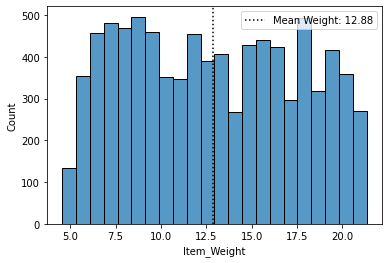

In [14]:
# plot the Item_Weight
ax = sns.histplot(data = df, x='Item_Weight')

mean_weight = round(df['Item_Weight'].mean(),2)
ax.axvline(mean_weight,color='k', ls=':', label = f'Mean Weight: {mean_weight:,.2f}')
ax.legend();

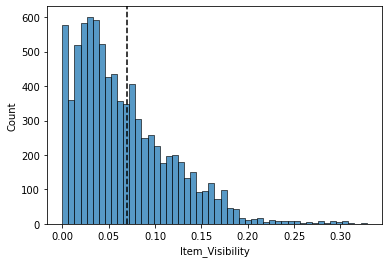

In [15]:
# plot the Item_Visibility
ax = sns.histplot(data = df, x='Item_Visibility')

mean_visibility = round(df['Item_Visibility'].mean(),2)
ax.axvline(mean_visibility,color='k', ls='--');

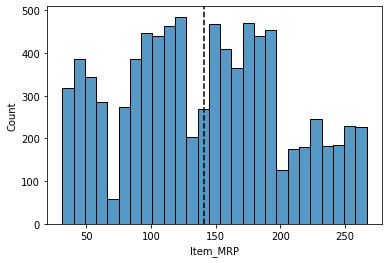

In [16]:
# plot the Item_MRP
ax = sns.histplot(data = df, x='Item_MRP')

mean_mrp = round(df['Item_MRP'].mean(),2)
ax.axvline(mean_mrp,color='k', ls='--');

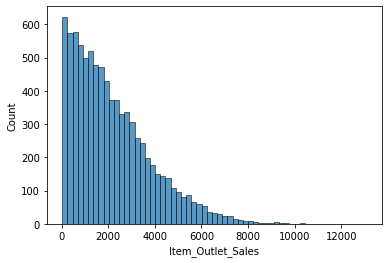

In [17]:
# plot the Item_Outlet_Sales
ax = sns.histplot(data = df, x='Item_Outlet_Sales')

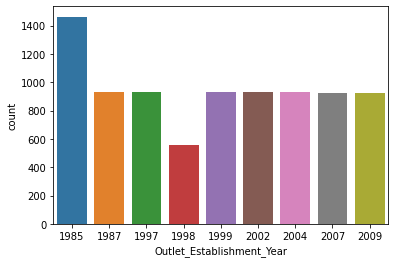

In [18]:
# plot the Outlet_Establishment_Year
ax = sns.countplot(data = df, x='Outlet_Establishment_Year')

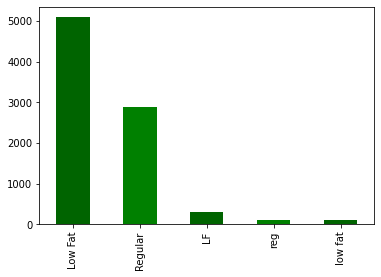

In [19]:
# count and sort the values of each item
fat_counts = df['Item_Fat_Content'].value_counts()

# plot the counts of each item fat content
fat_counts.plot(kind = 'bar', color = ['darkgreen', 'green'])
plt.show()

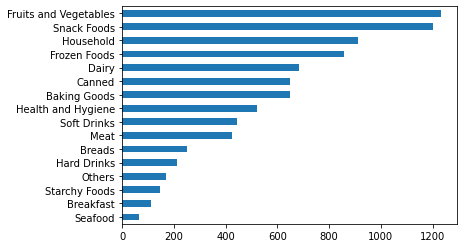

In [20]:
# count and sort each Item Type
type_counts = df['Item_Type'].value_counts().sort_values()

# plot Item Type
type_counts.plot(kind = 'barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


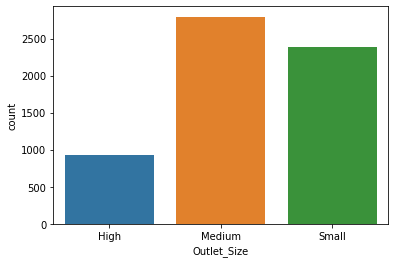

In [21]:
# plot the Outlet Size
sns.countplot(df['Outlet_Size'].sort_values())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


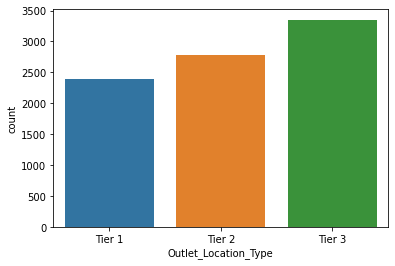

In [22]:
# plot the Outlet Location Type
sns.countplot(df['Outlet_Location_Type'].sort_values())

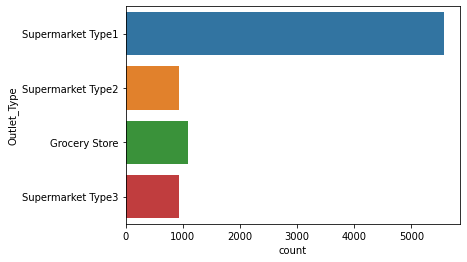

In [23]:
# plot the Outlet_Type
sns.countplot(data=df, y='Outlet_Type')

In [24]:
# check the correlation coeeficient of each numerical features
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025975,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.013426,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013168,-0.128625,0.567574,-0.049135,1.000000


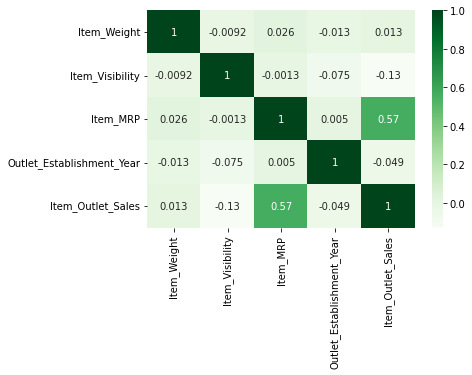

In [25]:
# display the heat map with labels
sns.heatmap(corr, annot = True, cmap = 'Greens')

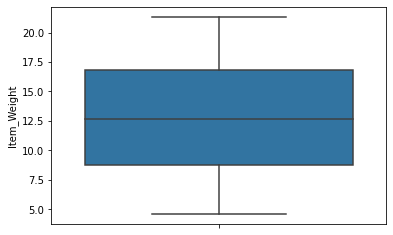

In [26]:
sns.boxplot(data=df, y='Item_Weight')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


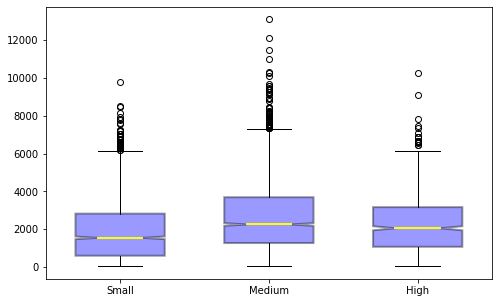

In [27]:
small = df.loc[df['Outlet_Size'] == 'Small', 'Item_Outlet_Sales'].values
medium = df.loc[df['Outlet_Size'] == 'Medium', 'Item_Outlet_Sales'].values
high = df.loc[df['Outlet_Size'] == 'High', 'Item_Outlet_Sales'].values

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(8,5))
boxplots = axes.boxplot([small, medium, high], notch = True, 
             labels = ['Small','Medium', 'High'],
             widths = 0.6,
             patch_artist = True,
             medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
             boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha=0.4))

## Ordinal Encoding

In [28]:
# check for data inconsistencies on 'Outlet Size' 
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [29]:
# Ordinal encoding for 'Outlet_size'
replacement_dict = {'Small':0, 'Medium':1, 'High':2}
df['Outlet_Size'].replace(replacement_dict, inplace=True)
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [30]:
# check for data inconsistencies in 'Outlet_Location_Type' column
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [31]:
# Ordinal encoding for 'Outlet_Location_Type'
replacement_dict = {'Tier 1':0, 'Tier 2':1, 'Tier 3':2}
df['Outlet_Location_Type'].replace(replacement_dict, inplace=True)
df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

## Validation Split

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 799.2+ KB


In [33]:
# assign X features, y target, and train-test split
X = df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Instantiate Column Selector

In [34]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instantiate Transformers

In [38]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## Instantiate Pipelines

In [39]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [40]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## Instantiate ColumnTransformer

In [41]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe80afb3ed0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe80afb3e10>)])

## Transformer Data

In [42]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe80afb3ed0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe80afb3e10>)])

In [43]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[ 0.73647351, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49910838, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.1266724 ,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.0062066 , -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.59961942, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73647351, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])